In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("IPL_2023-22_Sold_Players.csv")

In [4]:
df

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"
...,...,...,...,...,...,...
279,2022,Fazalhaq Farooqi,Overseas,Bowler,Sunrisers Hyderabad,"50,00,000"
280,2022,Sean Abbott,Overseas,Bowler,Sunrisers Hyderabad,"2,40,00,000"
281,2022,R Samarth,Indian,Batsman,Sunrisers Hyderabad,"20,00,000"
282,2022,Shashank Singh,Indian,All-Rounder,Sunrisers Hyderabad,"20,00,000"


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   season       284 non-null    int64 
 1   name         284 non-null    object
 2   nationality  284 non-null    object
 3   type         284 non-null    object
 4   team         284 non-null    object
 5   price        284 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.4+ KB


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df["price"] = df["price"].str.replace(",","")
df["price"] = pd.to_numeric(df["price"])

In [8]:
df["type"].unique()

array(['Batter ', 'All-Rounder ', 'Bowler ', 'Wicket-Keeper ', 'Batsman ',
       'Wicket Keeper '], dtype=object)

In [9]:
df["type"]=df["type"].str.strip()

In [10]:
df["type"]=df["type"].str.replace("Wicket-Keeper","Wicket Keeper")
df["type"]=df["type"].str.replace("Batter","Batsman")

In [11]:
df["type"].unique()

array(['Batsman', 'All-Rounder', 'Bowler', 'Wicket Keeper'], dtype=object)

In [12]:
df.isnull().sum()

season         0
name           0
nationality    0
type           0
team           0
price          0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df["nationality"].value_counts()

Indian       188
Overseas      96
Name: nationality, dtype: int64

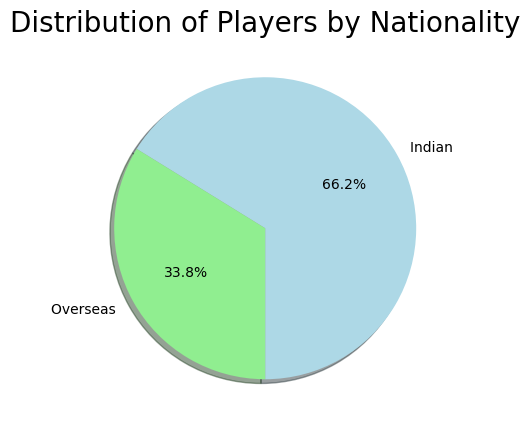

In [82]:
plt.figure(figsize = (10,5) , dpi = 100)

plt.pie(df["nationality"].value_counts().values,
        labels = df["nationality"].value_counts().index,
        colors = ["lightblue", "lightgreen"], 
        autopct='%1.1f%%',
        shadow = True, 
        startangle = 270)
plt.title("Distribution of Players by Nationality",fontsize=20)

#plt.show()
plt.savefig("Distribution of Players by Nationality.png")

In [168]:
df["team"].value_counts()

 Sunrisers Hyderabad            33
 Rajasthan Royals               30
 Kolkata Knight Riders          29
 Mumbai Indians                 29
 Punjab Kings                   29
 Chennai Super Kings            28
 Lucknow Super Giants           28
 Gujarat Titans                 27
 Royal Challengers Bangalore    26
 Delhi Capitals                 25
Name: team, dtype: int64

In [20]:
team=df["team"].value_counts(sort=True,ascending=True).reset_index()
team.rename(columns={"index":"team","team":"count"},inplace=True)
team

,team,count
0,Delhi Capitals,25
1,Royal Challengers Bangalore,26
2,Gujarat Titans,27
3,Chennai Super Kings,28
4,Lucknow Super Giants,28
5,Kolkata Knight Riders,29
6,Mumbai Indians,29
7,Punjab Kings,29
8,Rajasthan Royals,30
9,Sunrisers Hyderabad,33


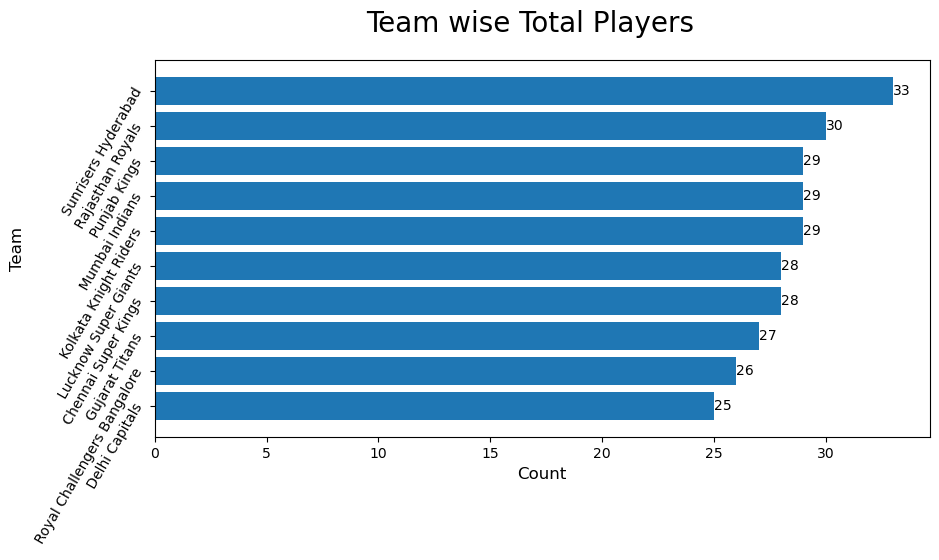

In [89]:
fig,axs = plt.subplots(figsize=(10,5),dpi=100)
fig.suptitle("Team wise Total Players",fontsize=20)

pos = plt.np.arange(0,len(team["team"]))

axs.barh(pos,team["count"])

for i,v in enumerate(team["count"]):
    axs.text(v,i-0.1,str("{0}".format(v)))
    
axs.set_yticks(pos)
axs.set_yticklabels(team["team"],rotation=60)

axs.set_xlabel("Count",fontsize=12)
axs.set_ylabel("Team",fontsize=12)

#plt.show()
plt.savefig("Team wise Total Players.png")

In [170]:
df["type"].value_counts()

All-Rounder      106
Bowler            96
Batsman           48
Wicket Keeper     34
Name: type, dtype: int64

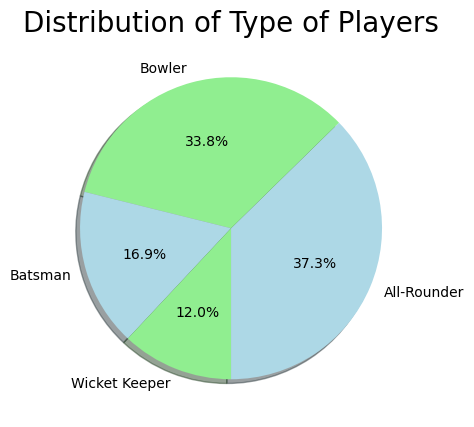

In [83]:
plt.figure(figsize = (10,5) , dpi = 100)

plt.pie(df["type"].value_counts().values,
        labels = df["type"].value_counts().index,
        colors = ["lightblue", "lightgreen"], 
        autopct='%1.1f%%',
        shadow = True, 
        startangle = 270)
plt.title("Distribution of Type of Players",fontsize=20)

#plt.show()
plt.savefig("Distribution of Type of Players.png")

In [28]:
# Convering scientic notation to float number
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [29]:
df["price"].describe()

count         284.00
mean     25306338.03
std      35450575.19
min       2000000.00
25%       2000000.00
50%       7500000.00
75%      30500000.00
max     185000000.00
Name: price, dtype: float64

In [30]:
team_avg=df.groupby("team").agg({"price":"mean"}).sort_values(by="price").reset_index()

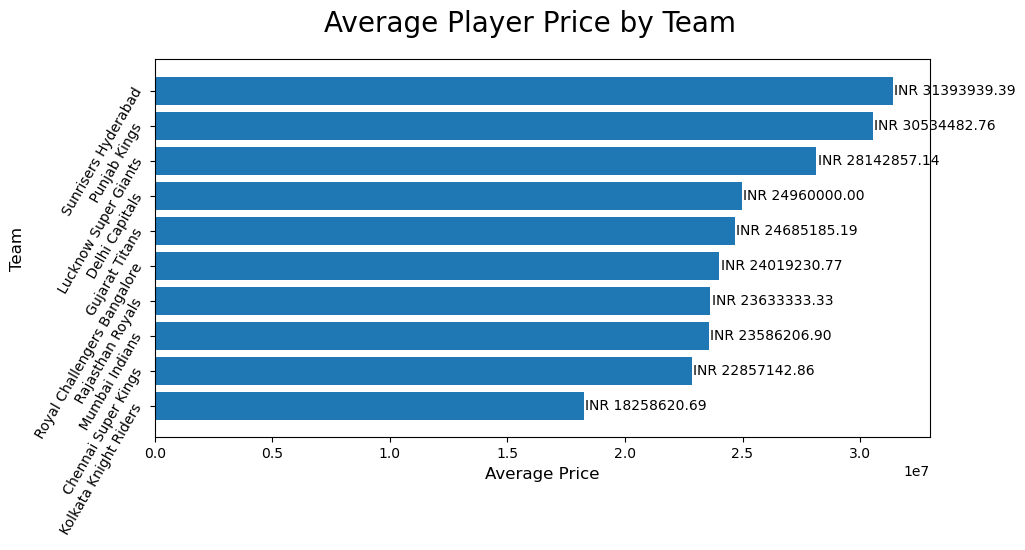

In [91]:
fig,axs = plt.subplots(figsize=(10,5),dpi=100)
fig.suptitle("Average Player Price by Team",fontsize=20)

pos = plt.np.arange(0,len(team_avg["team"]))

axs.barh(pos,team_avg["price"])

for i,v in enumerate(team_avg["price"]):
    axs.text(v+50000,i-0.1,"INR "+str("{0:.2f}".format(v)))
    
axs.set_yticks(pos)
axs.set_yticklabels(team_avg["team"],rotation=60)

axs.set_xlabel("Average Price",fontsize=12)
axs.set_ylabel("Team",fontsize=12)

#plt.show()
plt.savefig("Average Player Price by Team.png")

In [32]:
type_avg=df.groupby("type").agg({"price":"mean"}).sort_values(by="price").reset_index()

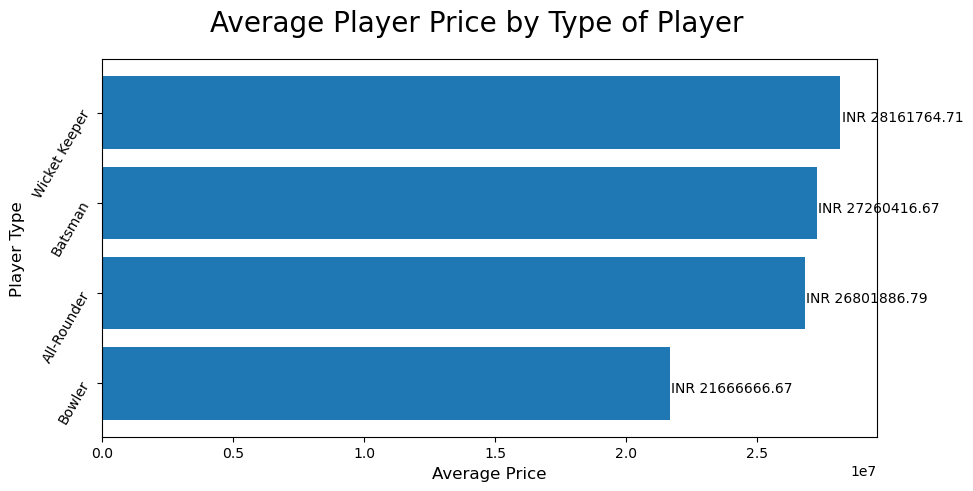

In [92]:
fig,axs = plt.subplots(figsize=(10,5),dpi=100)
fig.suptitle("Average Player Price by Type of Player",fontsize=20)

pos = plt.np.arange(0,len(type_avg["type"]))

axs.barh(pos,type_avg["price"])

for i,v in enumerate(type_avg["price"]):
    axs.text(v+50000,i-0.1,"INR "+str("{0:.2f}".format(v)))
    
axs.set_yticks(pos)
axs.set_yticklabels(type_avg["type"],rotation=60)

axs.set_xlabel("Average Price",fontsize=12)
axs.set_ylabel("Player Type",fontsize=12)

#plt.show()
plt.savefig("Average Player Price by Type of Player.png")

In [80]:
top_20 = df.sort_values(by=["price"],ascending=False).reset_index().loc[0:19].sort_values(by="price").reset_index(drop=True)

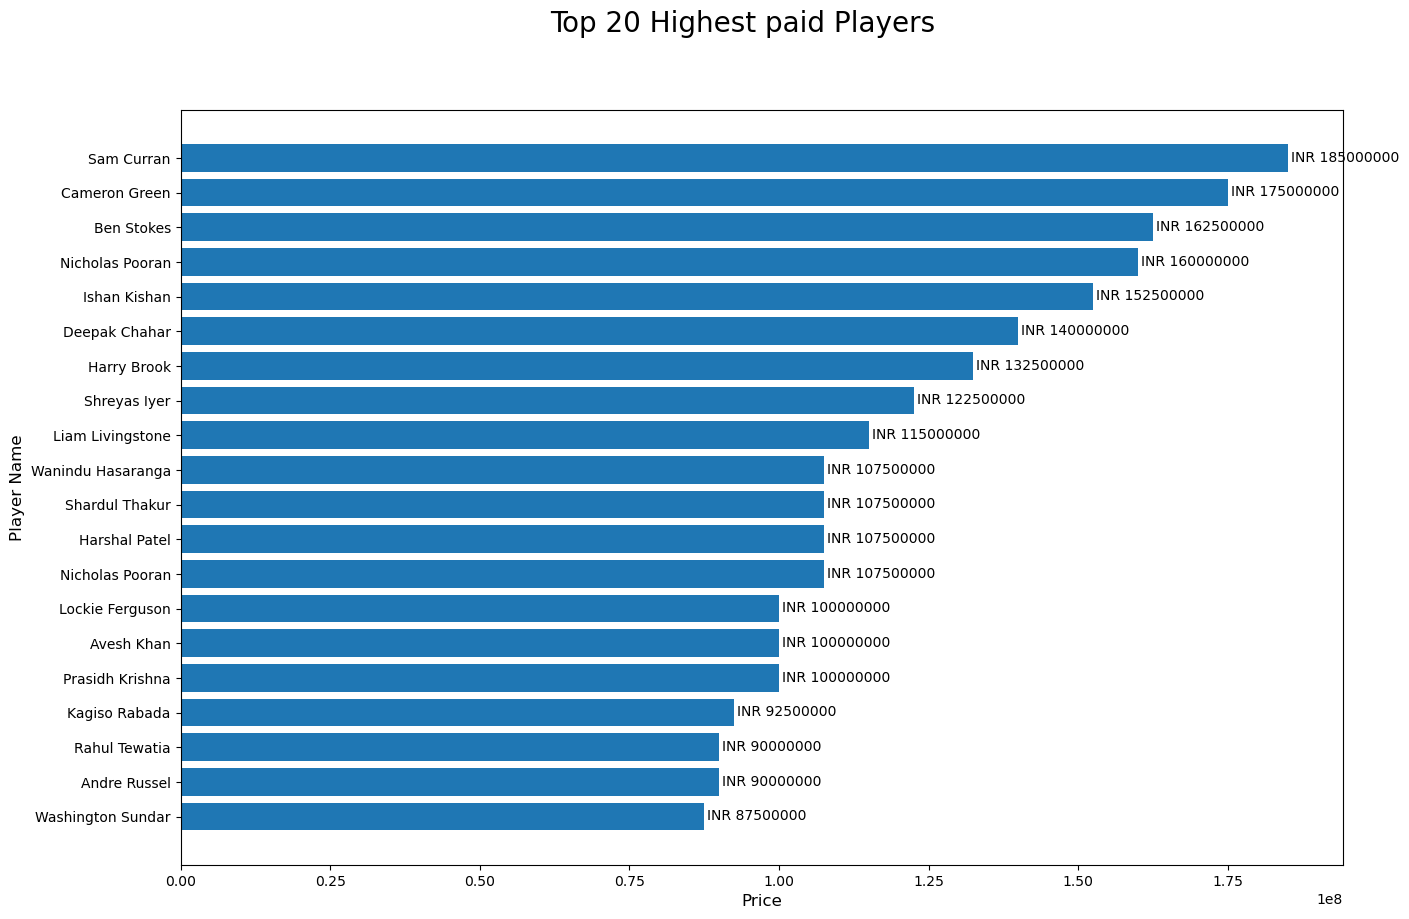

In [81]:
import matplotlib.pyplot as plt
fig,axs =plt.subplots(figsize=(15,10),dpi=100)
fig.suptitle("Top 20 Highest paid Players",fontsize=20)

pos = np.arange(len(top_20["name"]))

axs.barh(pos,top_20["price"])

for i,v in enumerate(top_20["price"]):
    axs.text(v+500000,i-0.1,"INR "+str("{0}".format(v)))
    
axs.set_yticks(pos)
axs.set_yticklabels(top_20["name"])

plt.xlabel("Price",fontsize=12)
plt.ylabel("Player Name",fontsize=12)
#plt.show()
plt.savefig("Top 20 Highest paid Players.png")

In [36]:
top_20["type"].value_counts()

All-Rounder      9
Bowler           6
Wicket Keeper    3
Batsman          2
Name: type, dtype: int64

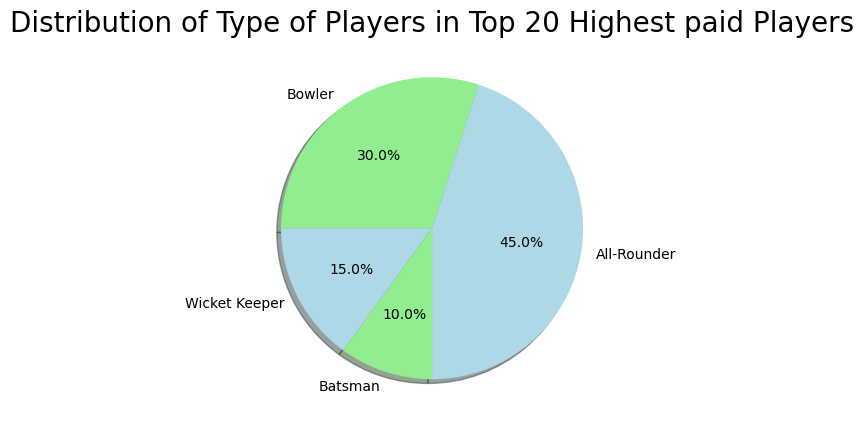

In [84]:
plt.figure(figsize = (10,5) , dpi = 100)

plt.pie(top_20["type"].value_counts().values,
        labels = top_20["type"].value_counts().index,
        colors = ["lightblue", "lightgreen"], 
        autopct='%1.1f%%',
        shadow = True, 
        startangle = 270)
plt.title("Distribution of Type of Players in Top 20 Highest paid Players",fontsize=20)

#plt.show()
plt.savefig("Distribution of Type of Players in Top 20 Highest paid Players")

In [38]:
top_20["nationality"].value_counts()

Indian       10
Overseas     10
Name: nationality, dtype: int64

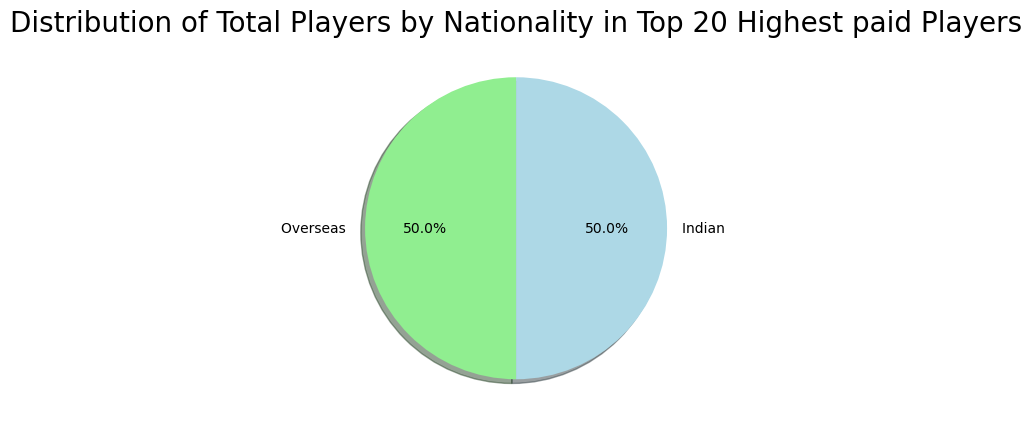

In [85]:
plt.figure(figsize = (10,5) , dpi = 100)

plt.pie(top_20["nationality"].value_counts().values,
        labels = top_20["nationality"].value_counts().index,
        colors = ["lightblue", "lightgreen"], 
        autopct='%1.1f%%',
        shadow = True, 
        startangle = 270)
plt.title("Distribution of Total Players by Nationality in Top 20 Highest paid Players",fontsize=20)

#plt.show()
plt.savefig("Distribution of Total Players by nationality in Top 20 Highest paid Players.png")

In [46]:
team_type=top_20["team"].value_counts(sort=True,ascending=True).reset_index()
team_type.rename(columns={"index":"team","team":"count"},inplace=True)

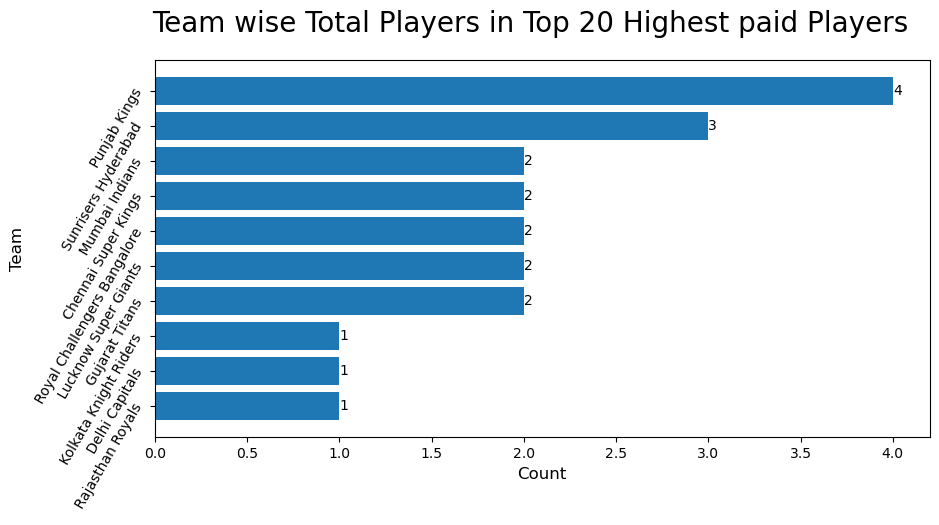

In [88]:
fig,axs = plt.subplots(figsize=(10,5),dpi=100)
fig.suptitle("Team wise Total Players in Top 20 Highest paid Players",fontsize=20)

pos = plt.np.arange(0,len(team_type["team"]))

axs.barh(pos,team_type["count"])

for i,v in enumerate(team_type["count"]):
    axs.text(v,i-0.1,str("{0}".format(v)))
    
axs.set_yticks(pos)
axs.set_yticklabels(team_type["team"],rotation=60)

axs.set_xlabel("Count",fontsize=12)
axs.set_ylabel("Team",fontsize=12)

#plt.show()
plt.savefig("Team wise Total Players in Top 20 Highest paid Players.png")